# Oración 4: "Estos amigos manipulan jugadores con sus piezas" - Shift Reduce Parser

In [1]:
import nltk
import re

In [2]:
def sr_parser(oracion, gramatica):                   
    oracion = oracion.lower()
    if oracion.endswith('.'):
        oracion = re.sub('\.',' ',oracion)
    else:
        oracion = oracion
    lista_palabras = oracion.split()
    gramatica = nltk.data.load(gramatica)
    sr_parser = nltk.ShiftReduceParser(gramatica)
    for arbol in sr_parser.parse(lista_palabras):
        print("- Este es el árbol resultante: ", arbol)
        return(arbol)

Escribí una oración:
Estos amigos manipulan jugadores con sus piezas
- Este es el árbol resultante:  (S
  (SNN (DN estos) (NN amigos))
  (SV
    (V manipulan)
    (SNAC2 (NAC jugadores))
    (SP (P con) (SNP (DP sus) (NP piezas)))))


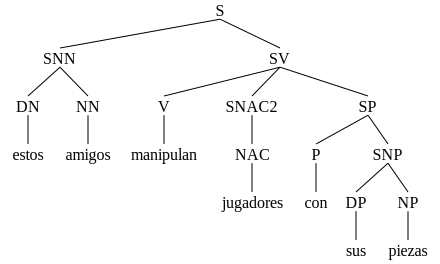

In [3]:
print('Escribí una oración:')
oracion4 = input()
gramatica = 'gramaticas/gramatica_oracion_4.cfg'
sr_parser(oracion4, gramatica)

# Oraciones que acepta la gramática: 
# "Estos amigos manipulan jugadores con sus piezas"

# Explicación de la falla en el parseo de la oración 4

La falla que indica al señalar “Warning: SNAC1 -> NAC SP will never be used” tiene relación con las limitaciones de este parser. 

La oración es ambigua y acepta dos estructuras posibles:

1. Estos amigos [manipulan [jugadores [con sus piezas]].

2. Estos amigos [manipulan [jugadores] [con sus piezas]].

Sin embargo, el Shift Reduce Parser solo puede devolver un árbol posible. Por lo tanto, al tomar la regla “SNAC2 -> NAC” que se corresponde con la interpretación de (2), va a ignorar la regla “SNAC1 -> NAC SP” que se vincula con la interpretación de (1).